Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_242 (Conv2D)             (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_242[0][0]                 
__________________________________________________________________________________________________
batch_normalization_240 (BatchN (None, 56, 56, 64)   256         max_pooling2d_2[0][0]            
____________________________________________________________________________________________

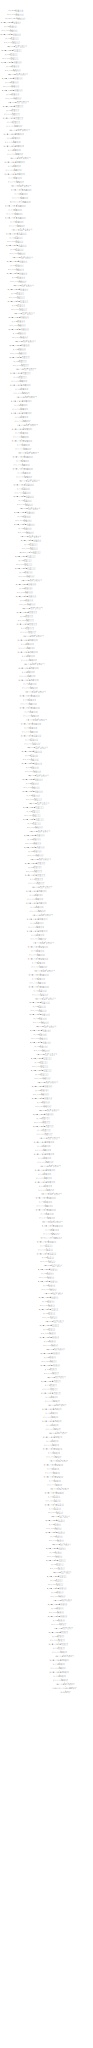

In [3]:
import pandas as pd
import numpy as np
import random

#CUDA -->>
#Parser for command-line arguments

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG, display
import pydot
import graphviz

# Creating Densenet121
def densenet(input_shape, n_classes, filters=32):
    # batch norm + relu + conv
    def bn_rl_conv(x, filters, kernel=1, strides=1):

        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides, padding='same')(x)
        return x

    def dense_block(x, repetition):

        for _ in range(repetition):
            y = bn_rl_conv(x, 4 * filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y, x])
        return x

    def transition_layer(x):

        x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
        x = AvgPool2D(2, strides=2, padding='same')(x)
        return x

    input = Input(input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(input)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    for repetition in [6, 12, 24, 16]:
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model



def main():
    input_shape = 224, 224, 3
    n_classes = 3
    model = densenet(input_shape, n_classes)
    model.summary()

    display(SVG(model_to_dot(
        model, show_shapes=True, show_layer_names=True, rankdir='TB',
        expand_nested=False, dpi=60, subgraph=False
    ).create(prog='dot', format='svg')))


main()